In [194]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import seaborn as sns
from prettytable import PrettyTable
from scipy.stats import multivariate_normal
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from joblib import dump
from joblib import load
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, roc_auc_score

In [195]:
#read the data
df = pd.read_csv("/kaggle/input/network-model-14/networktrafficdata.csv", encoding='ISO-8859-1')
df

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,Acknowledgment Number,Time to Live,Arrival Time,S7 Communication,Data length,Function,Length.1,Byte Address,Info,label
0,1,0.000000,192.168.0.2,192.168.0.1,COTP,145,0.000000,56667.0,102.0,1.0,1.0,128.0,"Jan 22, 2024 16:20:41.916356000 China Standard...",NaN,NaN,NaN,NaN,NaN,DT TPDU (0) EOT,Normal
1,2,0.000499,192.168.0.2,192.168.0.1,COTP,61,0.000499,56667.0,102.0,92.0,55.0,128.0,"Jan 22, 2024 16:20:41.916855000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
2,3,0.000710,192.168.0.2,192.168.0.1,COTP,61,0.000211,56667.0,102.0,99.0,317.0,128.0,"Jan 22, 2024 16:20:41.917066000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3,4,0.077318,192.168.0.2,192.168.0.1,COTP,61,0.000000,56665.0,102.0,1.0,1.0,128.0,"Jan 22, 2024 16:20:41.993674000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
4,5,0.316463,192.168.0.2,192.168.0.1,COTP,145,0.315753,56667.0,102.0,106.0,317.0,128.0,"Jan 22, 2024 16:20:42.232819000 China Standard...",NaN,NaN,NaN,NaN,NaN,DT TPDU (0) EOT,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,3921,187.656357,192.168.0.2,192.168.0.1,COTP,61,0.000457,56667.0,102.0,63330.0,191321.0,128.0,"Jan 22, 2024 16:23:49.572713000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3921,3922,187.656512,192.168.0.2,192.168.0.1,COTP,61,0.000155,56667.0,102.0,63337.0,191583.0,128.0,"Jan 22, 2024 16:23:49.572868000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3922,3923,187.658886,PcsCompu_53:3b:4f,LLDP_Multicast,LLDP,152,NaN,NaN,NaN,NaN,NaN,NaN,"Jan 22, 2024 16:23:49.575242000 China Standard...",NaN,NaN,NaN,NaN,NaN,LA/windows10 LA/port-001 20 SysN=WINDOWS10 Sys...,Abnormal
3923,3924,187.842001,192.168.0.13,192.168.0.1,TCP,60,32.809577,43430.0,102.0,1.0,1.0,64.0,"Jan 22, 2024 16:23:49.758357000 China Standard...",NaN,NaN,NaN,NaN,NaN,[TCP Dup ACK 373#5] 43430 > 102 [ACK] Seq=1 ...,Abnormal


In [196]:
# Assuming you have a DataFrame called df
missing_values = df.isna()  # or df.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the count of missing values per column
print(missing_count)

No.                                                0
Time                                               0
Source                                             0
Destination                                        0
Protocol                                           0
Length                                             0
Time since previous frame in this TCP stream     774
Source Port                                      774
Destination Port                                 774
Sequence Number                                  774
Acknowledgment Number                            774
Time to Live                                     207
Arrival Time                                       0
S7 Communication                                3771
Data length                                     3771
Function                                        3771
Length.1                                        3864
Byte Address                                    3772
Info                                          

In [197]:
# Replace NaN values with 0
df.fillna(0, inplace=True)

In [198]:
df.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length',
       'Time since previous frame in this TCP stream', 'Source Port',
       'Destination Port', 'Sequence Number', 'Acknowledgment Number',
       'Time to Live', 'Arrival Time', 'S7 Communication', 'Data length',
       'Function', 'Length.1', 'Byte Address', 'Info', 'label'],
      dtype='object')

In [199]:
df.rename(columns={'label': 'Label'}, inplace=True)

In [200]:
# Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
numeric_columns = ['Source', 'Destination','Protocol','Length',
       'Source Port',
       'Destination Port', 
       'Time to Live', 'Byte Address']

def preprocessing(df,numeric_columns):
    #copy of dataframe
    data = df.copy()
    # Replace NaN values with 0
    data.fillna(0, inplace=True)
    
        # Assuming you have a DataFrame named 'your_dataframe' with a column named 'old_column_name'
    # Rename 'old_column_name' to 'new_column_name'
    

    '''
      # Replace 0 values in 'Function' column with 'Unknown'
    data['Function'] = data['Function'].replace(0, 'Unknown')

    # Label encoding for specific string columns
    label_encoder = LabelEncoder()

    # Only encode string values while keeping 0s intact
    mask = data['Function'].apply(lambda x: isinstance(x, str))
    data.loc[mask, 'Function'] = label_encoder.fit_transform(data.loc[mask, 'Function'])
    data['Function'] = data['Function'].astype(int)
    '''
    # Convert labels to numeric form using label encoding
    label_encoder = LabelEncoder()
    
   

    data['Source'] = data['Source'].apply(lambda x: 0 if x in ['192.168.0.1', '192.168.0.2'] else 1)
    data['Destination'] = data['Destination'].apply(lambda x: 0 if x in ['192.168.0.1', '192.168.0.2'] else 1)
    
    data['Byte Address'] = data['Byte Address'].apply(lambda x: 0 if x in [int('0')] else 1)
    
    
    # Assuming 'data' is your DataFrame and 'Protocol' column needs encoding
    data['Protocol'] = data['Protocol'].fillna('Unknown')  # Fill NaN values with 'Unknown'

    known_protocols = ['ARP', 'BROWSER', 'COTP', 'ICMPv6', 'IGMPv3', 'IPv4', 'LLDP', 'LLMNR',
                       'MDNS', 'NBNS', 'NTP', 'OpcUa', 'S7COMM', 'SSDP', 'TCP','TPKT','ICMP']

    # Create a label encoder
    label_encoder = LabelEncoder()

    # Fit and transform the 'Protocol' column
    data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

    # Handling unknown protocols
    if 'Unknown' not in label_encoder.classes_:
        # Assign a unique value for 'Unknown' protocol
        unknown_label = max(data['Protocol']) + 1
        print(f"Assigning 'Unknown' protocol label as: {unknown_label}")
        data.loc[data['Protocol'] == 'Unknown', 'Protocol'] = unknown_label

    # Define a function to encode protocols or assign a default value for unknown ones
    def encode_protocol(protocol):
        if protocol in known_protocols:
            return label_encoder.transform([protocol])[0]
        else:
            return unknown_label  # Assign the value you previously determined for unknown protocols

    # Apply the encode_protocol function to the 'Protocol' column
    data['Protocol'] = data['Protocol'].apply(encode_protocol)
    
   
    # Fit and transform the 'Label' column
    data['Label'] = label_encoder.fit_transform(data['Label'])

    # Invert the labels
    data['Label'] = 1 - data['Label']
    y = data['Label']
    # Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
    data= data[numeric_columns]
    dataframe = data.copy()
    # Convert the list to a NumPy array
    labels = np.array(y)
    #get values from dataset
    raw_data = data.values
        # Convert the data to numeric type
   
    # Get values not last column which is target column
    data = raw_data[:, 0:-1]
    #normalization of data
    data = ((data - data.min()) / (data.max() - data.min()))*2
    return dataframe,data,labels

In [201]:
#output of the function (dataframe)
dataframe,data,labels = preprocessing(df,numeric_columns)
dataframe

Assigning 'Unknown' protocol label as: 13


,Source,Destination,Protocol,Length,Source Port,Destination Port,Time to Live,Byte Address
0,0,0,13,145,56667.0,102.0,128.0,0
1,0,0,13,61,56667.0,102.0,128.0,0
2,0,0,13,61,56667.0,102.0,128.0,0
3,0,0,13,61,56665.0,102.0,128.0,0
4,0,0,13,145,56667.0,102.0,128.0,0
...,...,...,...,...,...,...,...,...
3920,0,0,13,61,56667.0,102.0,128.0,0
3921,0,0,13,61,56667.0,102.0,128.0,0
3922,1,1,13,152,0.0,0.0,0.0,0
3923,1,0,13,60,43430.0,102.0,64.0,0


Epoch 1/50
86/86 [==============================] - 1s 5ms/step - loss: 0.5520 - accuracy: 0.6407 - val_loss: 0.4003 - val_accuracy: 0.8591
Epoch 2/50
86/86 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.8420 - val_loss: 0.3531 - val_accuracy: 0.8591
Epoch 3/50
86/86 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8435 - val_loss: 0.3244 - val_accuracy: 0.8591
Epoch 4/50
86/86 [==============================] - 0s 3ms/step - loss: 0.3647 - accuracy: 0.8504 - val_loss: 0.3083 - val_accuracy: 0.8591
Epoch 5/50
86/86 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8639 - val_loss: 0.2938 - val_accuracy: 0.8591
Epoch 6/50
86/86 [==============================] - 0s 3ms/step - loss: 0.3280 - accuracy: 0.8708 - val_loss: 0.2770 - val_accuracy: 0.8913
Epoch 7/50
86/86 [==============================] - 0s 4ms/step - loss: 0.3072 - accuracy: 0.8806 - val_loss: 0.2641 - val_accuracy: 0.8930
Epoch 8/50
86/86 [==

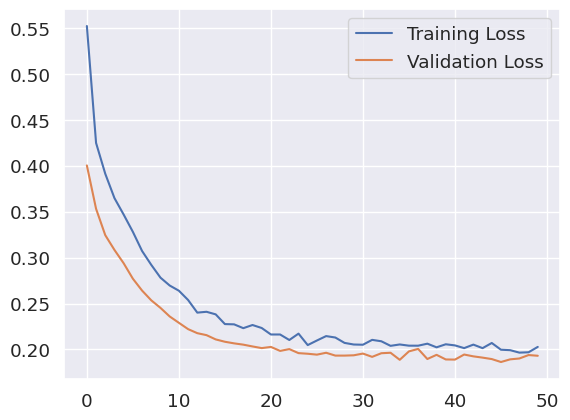

19/19 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9287


In [202]:
def neural_networks(data, labels):
    X = data
    y = labels

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
   

    #undersample = RandomUnderSampler(random_state=42)
    #X_train, y_train = undersample.fit_resample(X_train, y_train)
    # Apply SMOTE for oversampling on training data
    #smote = SMOTE(random_state=42)
    #X_train, y_train = smote.fit_resample(X_train, y_train)

    # Build a simple neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),  # Replace num_features with the actual number of features
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
    #plot training loss and validation loss
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    # Save the plot
    plt.savefig('loss_plot.png')  # Change the file extension and name as needed
    plt.show()
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model on the validation set
    nn_val_loss, nn_val_accuracy = model.evaluate(X_val, y_val)
    y_pred_binary = (y_pred > 0.5).astype(int)
    nn_predictions = y_pred_binary
    # Print evaluation metrics or use an existing function
    #print_stats(y_pred_binary, y_test)
    # Assuming your neural network model is defined in the neural_networks function
    # Train the neural network model and save it
   
    model.save("neural_network_model.h5")

    return nn_predictions,nn_val_loss, nn_val_accuracy,y_pred


# Example usage
nn_predictions,nn_val_loss, nn_val_accuracy,y_pred = neural_networks(data, labels)

In [203]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


def machine_learning_data(data, labels,nn_predictions,nn_val_loss, nn_val_accuracy,y_pred):
    X = data
    y = labels

    # Split data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    #undersample = RandomUnderSampler(random_state=42)
    #X_train, y_train = undersample.fit_resample(X_train, y_train)
    ## Apply SMOTE for oversampling on training data
    #smote = SMOTE(random_state=42)
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Calculate and print the sizes of the datasets
    size_X = len(X)
    size_X_train = len(X_train)
    size_X_val = len(X_val)
    size_X_test = len(X_test)

    print(f"Size of the original dataset (X): {size_X}")
    print(f"Size of the training set (X_train): {size_X_train}")
    print(f"Size of the validation set (X_val): {size_X_val}")
    print(f"Size of the test set (X_test): {size_X_test}")
    
    # Initialize machine learning models with adjusted training data
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
    svm_model = SVC(C=1.0, kernel='rbf', gamma='scale')
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
    lr_model = LogisticRegression(C=1.0, solver='lbfgs')
    xgboost_model = XGBClassifier(objective='binary:logistic')

    # Train machine learning models with resampled data
    rf_model.fit(X_train, y_train)
    svm_model.fit(X_train, y_train)
    gb_model.fit(X_train, y_train)
    lr_model.fit(X_train, y_train)
    xgboost_model.fit(X_train, y_train)
    # ... (rest of your code remains the same)
            # Save each scikit-learn model
    dump(rf_model, 'random_forest_model.joblib')
    dump(svm_model, 'svm_model.joblib')
    dump(gb_model, 'gradient_boosting_model.joblib')
    dump(lr_model, 'logistic_regression_model.joblib')
    dump(xgboost_model, 'xgboost_model.joblib')
    
    # Predictions for machine learning models on validation and test sets
    rf_val_predictions = rf_model.predict(X_val)
    svm_val_predictions = svm_model.predict(X_val)
    gb_val_predictions = gb_model.predict(X_val)
    lr_val_predictions = lr_model.predict(X_val)
    xgboost_val_predictions = xgboost_model.predict(X_val)
    
    # Evaluate metrics for machine learning models on validation set
    rf_val_accuracy = accuracy_score(y_val, rf_val_predictions)
    svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)
    gb_val_accuracy = accuracy_score(y_val, gb_val_predictions)
    lr_val_accuracy = accuracy_score(y_val, lr_val_predictions)
    xgboost_val_accuracy = accuracy_score(y_val, xgboost_val_predictions)
    
    # Predictions for machine learning models on test set
    rf_predictions = rf_model.predict(X_test)
    svm_predictions = svm_model.predict(X_test)
    gb_predictions = gb_model.predict(X_test)
    lr_predictions = lr_model.predict(X_test)
    xgboost_predictions = xgboost_model.predict(X_test)
    
    # Evaluate metrics for machine learning models on test set
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    gb_accuracy = accuracy_score(y_test, gb_predictions)
    lr_accuracy = accuracy_score(y_test, lr_predictions)
    xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)

    # Now, include the neural network model
    # Assuming neural_networks function is already defined and returns y_pred_binary
    #nn_predictions,nn_val_loss, nn_val_accuracy,y_pred = neural_networks(data, labels)
    
  
    # Evaluate metrics for the neural network model
    nn_accuracy = accuracy_score(y_test, nn_predictions)
    nn_precision = precision_score(y_test, nn_predictions)
    nn_recall = recall_score(y_test, nn_predictions)
    nn_f1 = f1_score(y_test, nn_predictions)
    nn_roc_auc = roc_auc_score(y_test, nn_predictions)
    
    
    # Print results for machine learning models
    print("\nMachine Learning Model Accuracy Scores on Validation Set:")
    print("-------------------------------------")
    print("-------------------------------------")
    print(f"Random Forest: {rf_val_accuracy:.5f}")
    print(f"SVM: {svm_val_accuracy:.5f}")
    print(f"Gradient Boosting: {gb_val_accuracy:.5f}")
    print(f"Logistic Regression: {lr_val_accuracy:.5f}")
    print(f"XGBoost: {xgboost_val_accuracy:.5f}")
    print(f"Neural Network (Validation): {nn_val_accuracy:.5f}\n")
    print("-------------------------------------")
    print("-------------------------------------")

    # Print results for machine learning models
    print("\nMachine Learning Model Accuracy Scores on Test Set:")
    print("-------------------------------------")
    print("-------------------------------------\n")
    print(f"Random Forest: {rf_accuracy:.5f}")
    print(f"SVM: {svm_accuracy:.5f}")
    print(f"Gradient Boosting: {gb_accuracy:.5f}")
    print(f"Logistic Regression: {lr_accuracy:.5f}")
    print(f"XGBoost: {xgboost_accuracy:.5f}")
    print(f"Neural Network: {nn_accuracy:.5f}\n")
    print("-------------------------------------")
    print("-------------------------------------\n")


    '''
    # Print results for the neural network model
    print("Neural Network Model Metrics:")
    print(f"Accuracy: {nn_accuracy}")
    print(f"Precision: {nn_precision}")
    print(f"Recall: {nn_recall}")
    print(f"F1-score: {nn_f1}")
    print(f"ROC AUC: {nn_roc_auc}")'''
    return X_train, X_temp, y_train, y_temp,X_val, X_test, y_val, y_test,rf_val_accuracy,svm_val_accuracy,gb_val_accuracy,lr_val_accuracy,xgboost_val_accuracy,rf_val_predictions,svm_val_predictions,gb_val_predictions,lr_val_predictions,xgboost_val_predictions,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions,nn_predictions,y_test,rf_accuracy,svm_accuracy,gb_accuracy,lr_accuracy,xgboost_accuracy,nn_accuracy
# Example usage
# machine_learning_data(data, labels)
#model score comperation
X_train, X_temp, y_train, y_temp,X_val, X_test, y_val, y_test,rf_val_accuracy,svm_val_accuracy,gb_val_accuracy,lr_val_accuracy,xgboost_val_accuracy,rf_val_predictions,svm_val_predictions,gb_val_predictions,lr_val_predictions,xgboost_val_predictions,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions,nn_predictions,y_test,rf_accuracy,svm_accuracy,gb_accuracy,lr_accuracy,xgboost_accuracy,nn_accuracy = machine_learning_data(data, labels,nn_predictions,nn_val_loss, nn_val_accuracy,y_pred)

Size of the original dataset (X): 3925
Size of the training set (X_train): 2747
Size of the validation set (X_val): 589
Size of the test set (X_test): 589

Machine Learning Model Accuracy Scores on Validation Set:
-------------------------------------
-------------------------------------
Random Forest: 1.00000
SVM: 0.92869
Gradient Boosting: 1.00000
Logistic Regression: 0.85908
XGBoost: 1.00000
Neural Network (Validation): 0.92869

-------------------------------------
-------------------------------------

Machine Learning Model Accuracy Scores on Test Set:
-------------------------------------
-------------------------------------

Random Forest: 1.00000
SVM: 0.95076
Gradient Boosting: 1.00000
Logistic Regression: 0.87606
XGBoost: 1.00000
Neural Network: 0.95076

-------------------------------------
-------------------------------------



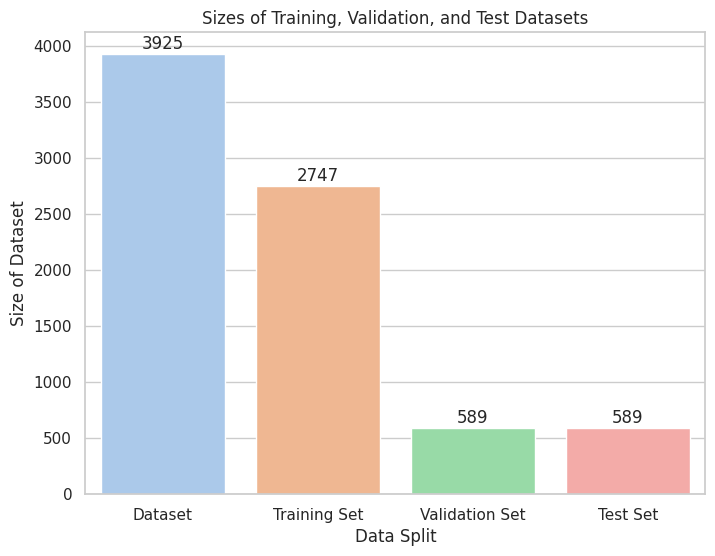

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the lengths of each dataset

size_X = len(data)
train_length = len(X_train)
val_length = len(X_val)
test_length = len(X_test)

# Create labels for the bar plot
labels = ['Dataset','Training Set', 'Validation Set', 'Test Set']
sizes = [size_X,train_length, val_length, test_length]

# Set the style for the plot
sns.set(style='whitegrid', palette='pastel')

# Plotting the bar plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=labels, y=sizes)
plt.xlabel('Data Split')
plt.ylabel('Size of Dataset')
plt.title('Sizes of Training, Validation, and Test Datasets')

# Annotate each bar with its value
for i, size in enumerate(sizes):
    ax.text(i, size + 10, str(size), ha='center', va='bottom', fontsize=12)
output_path = '/kaggle/working/Sizes_of_Train_Val_Test_Datasets.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


In [205]:
# Print the sizes
print(f"Size of the original dataset (X): {size_X}")
print(f"Size of the training set (X_train): {train_length}")
print(f"Size of the validation set (X_val): {val_length}")
print(f"Size of the test set (X_test): {test_length}")

Size of the original dataset (X): 3925
Size of the training set (X_train): 2747
Size of the validation set (X_val): 589
Size of the test set (X_test): 589


In [206]:
def results_machine_learning(y_test,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions):
    

    # Calculate evaluation metrics
    rf_precision = precision_score(y_test, rf_predictions)
    rf_recall = recall_score(y_test, rf_predictions)
    rf_f1 = f1_score(y_test, rf_predictions)
    rf_roc_auc = roc_auc_score(y_test, rf_predictions)

    svm_precision = precision_score(y_test, svm_predictions)
    svm_recall = recall_score(y_test, svm_predictions)
    svm_f1 = f1_score(y_test, svm_predictions)
    svm_roc_auc = roc_auc_score(y_test, svm_predictions)

    gb_precision = precision_score(y_test, gb_predictions)
    gb_recall = recall_score(y_test, gb_predictions)
    gb_f1 = f1_score(y_test, gb_predictions)
    gb_roc_auc = roc_auc_score(y_test, gb_predictions)

    lr_precision = precision_score(y_test, lr_predictions)
    lr_recall = recall_score(y_test, lr_predictions)
    lr_f1 = f1_score(y_test, lr_predictions)
    lr_roc_auc = roc_auc_score(y_test, lr_predictions)
    
    xgboost_precision = precision_score(y_test, xgboost_predictions)
    xgboost_recall = recall_score(y_test, xgboost_predictions)
    xgboost_f1 = f1_score(y_test, xgboost_predictions)
    xgboost_roc_auc = roc_auc_score(y_test, xgboost_predictions)
    
    # Evaluate metrics for the neural network model
    nn_accuracy = accuracy_score(y_test, nn_predictions)
    nn_precision = precision_score(y_test, nn_predictions)
    nn_recall = recall_score(y_test, nn_predictions)
    nn_f1 = f1_score(y_test, nn_predictions)
    nn_roc_auc = roc_auc_score(y_test, nn_predictions)
        # Create a dictionary to store the metrics
    results = {
        'Random Forest': {
            'Precision': rf_precision,
            'Recall': rf_recall,
            'F1-score': rf_f1,
            'ROC AUC': rf_roc_auc
        },
        'SVM': {
            'Precision': svm_precision,
            'Recall': svm_recall,
            'F1-score': svm_f1,
            'ROC AUC': svm_roc_auc
        },
        'Gradient Boosting': {
            'Precision': gb_precision,
            'Recall': gb_recall,
            'F1-score': gb_f1,
            'ROC AUC': gb_roc_auc
        },
        'Logistic Regression': {
            'Precision': lr_precision,
            'Recall': lr_recall,
            'F1-score': lr_f1,
            'ROC AUC': lr_roc_auc
        },
        'XGBoost': {
            'Precision': xgboost_precision,
            'Recall': xgboost_recall,
            'F1-score': xgboost_f1,
            'ROC AUC': xgboost_roc_auc
        },
        'Neural Network': {
            'Precision': nn_precision,
            'Recall': nn_recall,
            'F1-score': nn_f1,
            'ROC AUC': nn_roc_auc
        }
    }

    # Print the metrics for each model
    print("Random Forest Metrics:")
    print(f"Accuracy: {rf_accuracy}")
    print(f"Precision: {rf_precision}")
    print(f"Recall: {rf_recall}")
    print(f"F1-score: {rf_f1}")
    print(f"ROC AUC: {rf_roc_auc}")

    print("\nSVM Metrics:")
    print(f"Accuracy: {svm_accuracy}")
    print(f"Precision: {svm_precision}")
    print(f"Recall: {svm_recall}")
    print(f"F1-score: {svm_f1}")
    print(f"ROC AUC: {svm_roc_auc}")

    print("\nGradient Boosting Metrics:")
    print(f"Accuracy: {gb_accuracy}")
    print(f"Precision: {gb_precision}")
    print(f"Recall: {gb_recall}")
    print(f"F1-score: {gb_f1}")
    print(f"ROC AUC: {gb_roc_auc}")

    print("\nLogistic Regression Metrics:")
    print(f"Accuracy: {lr_accuracy}")
    print(f"Precision: {lr_precision}")
    print(f"Recall: {lr_recall}")
    print(f"F1-score: {lr_f1}")
    print(f"ROC AUC: {lr_roc_auc}")
    
    print("\nXGBoost Metrics:")
    print(f"Accuracy: {xgboost_accuracy}")
    print(f"Precision: {xgboost_precision}")
    print(f"Recall: {xgboost_recall}")
    print(f"F1-score: {xgboost_f1}")
    print(f"ROC AUC: {xgboost_roc_auc}")
    
    
    print("\nNeural Network Model Metrics:")
    print(f"Accuracy: {nn_accuracy}")
    print(f"Precision: {nn_precision}")
    print(f"Recall: {nn_recall}")
    print(f"F1-score: {nn_f1}")
    print(f"ROC AUC: {nn_roc_auc}")
    return results,rf_precision,rf_recall,rf_f1,rf_roc_auc,svm_precision,svm_recall,svm_f1,svm_roc_auc,gb_precision,gb_recall,gb_f1,gb_roc_auc,lr_precision,lr_recall,lr_f1,lr_roc_auc,xgboost_precision,xgboost_recall,xgboost_f1,xgboost_roc_auc,nn_accuracy,nn_precision,nn_recall,nn_f1,nn_roc_auc 
results,rf_precision,rf_recall,rf_f1,rf_roc_auc,svm_precision,svm_recall,svm_f1,svm_roc_auc,gb_precision,gb_recall,gb_f1,gb_roc_auc,lr_precision,lr_recall,lr_f1,lr_roc_auc,xgboost_precision,xgboost_recall,xgboost_f1,xgboost_roc_auc,nn_accuracy,nn_precision,nn_recall,nn_f1,nn_roc_auc  =results_machine_learning(y_test,rf_predictions,svm_predictions,gb_predictions,lr_predictions,xgboost_predictions)

Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0

SVM Metrics:
Accuracy: 0.9507640067911715
Precision: 0.8738317757009346
Recall: 0.9894179894179894
F1-score: 0.9280397022332507
ROC AUC: 0.9609589947089946

Gradient Boosting Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0

Logistic Regression Metrics:
Accuracy: 0.8760611205432938
Precision: 0.8411764705882353
Recall: 0.7566137566137566
F1-score: 0.7966573816155988
ROC AUC: 0.8445568783068784

XGBoost Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0

Neural Network Model Metrics:
Accuracy: 0.9507640067911715
Precision: 0.8738317757009346
Recall: 0.9894179894179894
F1-score: 0.9280397022332507
ROC AUC: 0.9609589947089946


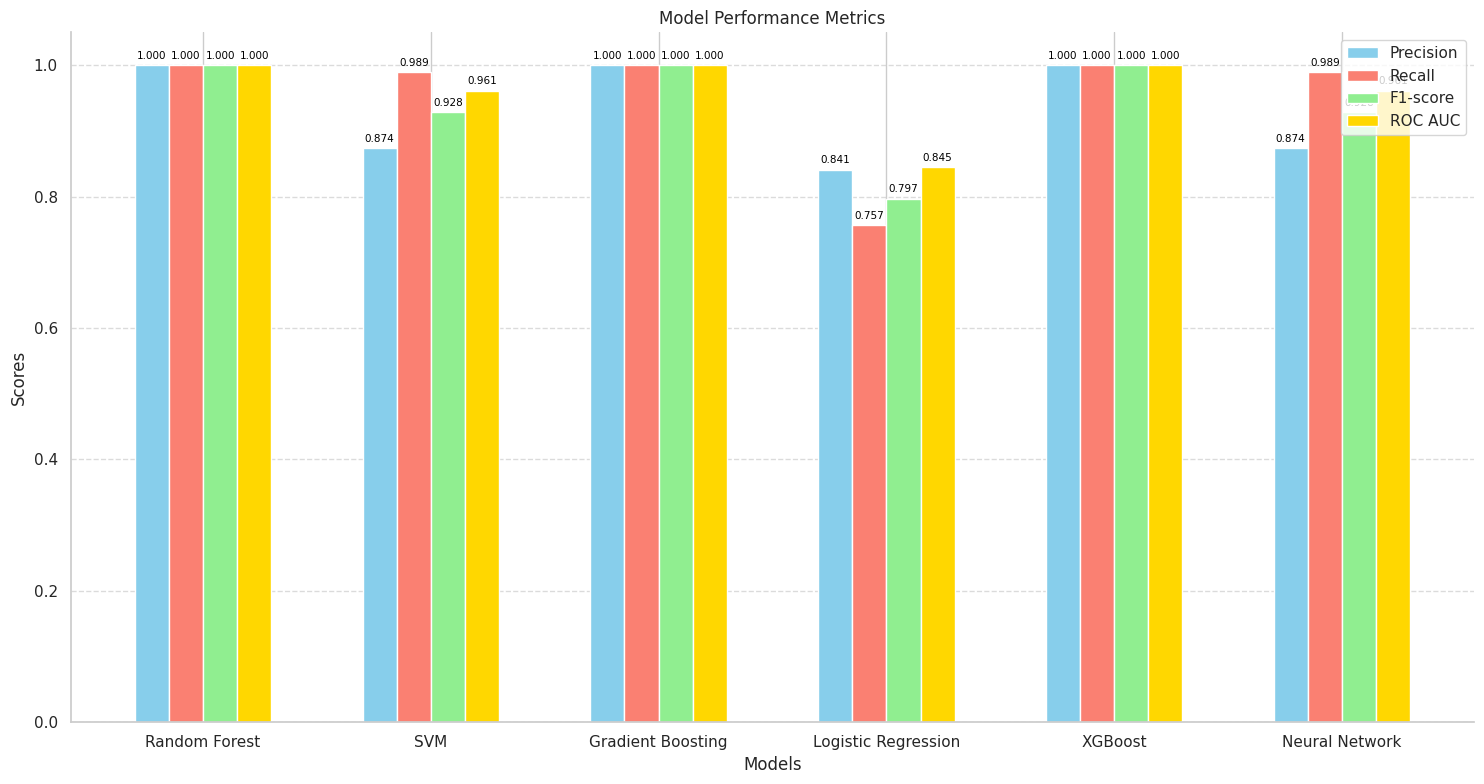

In [207]:


# Extract model names and metrics
model_names = list(results.keys())
metrics = list(results[model_names[0]].keys())

# Arrange the data for plotting
metric_values = {metric: [results[model][metric] for model in model_names] for metric in metrics}
x = np.arange(len(model_names))
bar_width = 0.15  # Width of the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']  # Colors for different metrics

# Plot grouped bars for each metric
fig, ax = plt.subplots(figsize=(15, 8))

for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + (i - 1.5) * bar_width, metric_values[metric], width=bar_width, label=metric, color=color)

# Annotations and labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend(loc='upper right')

# Adding gridlines and removing spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding data labels on top of bars
for i, metric in enumerate(metrics):
    for j, val in enumerate(metric_values[metric]):
        ax.text(j + (i - 1.5) * bar_width, val + 0.01, f'{val:.3f}', ha='center', color='black', fontsize=7.5)

plt.tight_layout()

# Save the plot
output_path = '/kaggle/working/model_performance_metrics2.png'
plt.savefig(output_path, bbox_inches='tight')

plt.show()


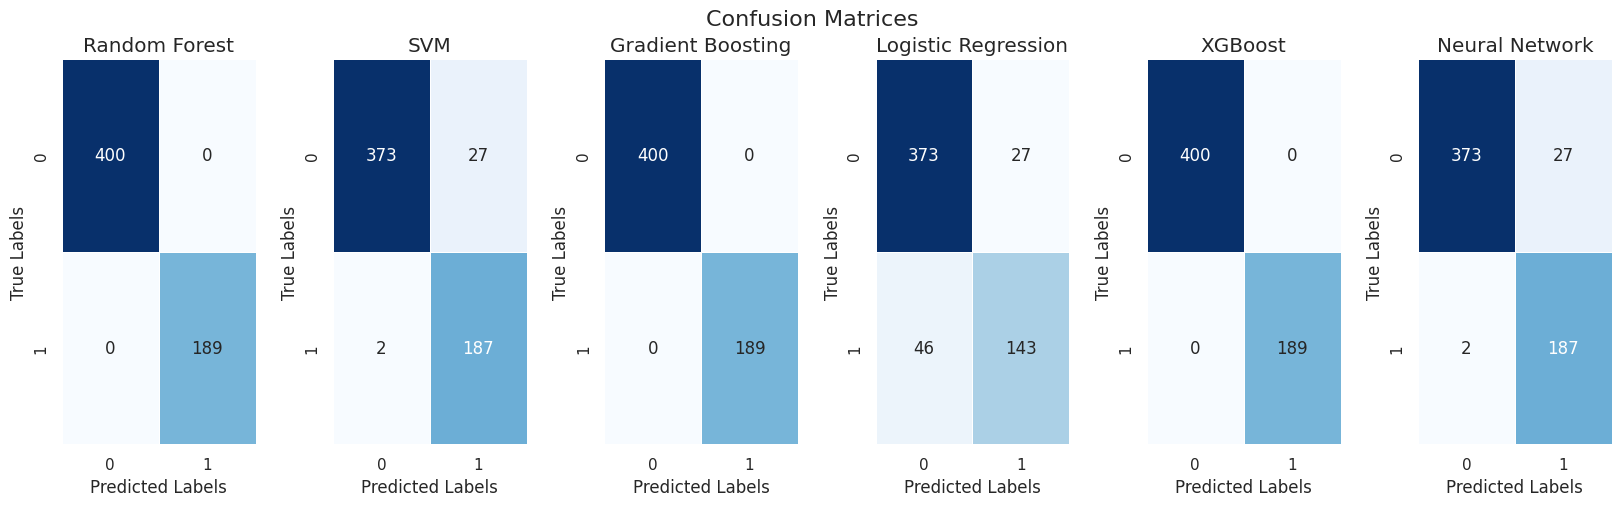

In [208]:
def plot_conf_matrix(y_test, rf_predictions, svm_predictions, gb_predictions, lr_predictions,xgboost_predictions,nn_predictions):
    # Create confusion matrices for each model
    rf_confusion = confusion_matrix(y_test, rf_predictions)
    svm_confusion = confusion_matrix(y_test, svm_predictions)
    gb_confusion = confusion_matrix(y_test, gb_predictions)
    lr_confusion = confusion_matrix(y_test, lr_predictions)
    xgboost_confusion = confusion_matrix(y_test, xgboost_predictions)
    nn_confusion = confusion_matrix(y_test, nn_predictions)

    # Create subplots for the confusion matrices
    fig, axs = plt.subplots(1, 6, figsize=(20, 5))
    fig.suptitle('Confusion Matrices', fontsize=16)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Plot Random Forest Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[0])
    axs[0].set_title("Random Forest")
    axs[0].set_xlabel('Predicted Labels')
    axs[0].set_ylabel('True Labels')

    # Plot SVM Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[1])
    axs[1].set_title("SVM")
    axs[1].set_xlabel('Predicted Labels')
    axs[1].set_ylabel('True Labels')

    # Plot Gradient Boosting Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(gb_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[2])
    axs[2].set_title("Gradient Boosting")
    axs[2].set_xlabel('Predicted Labels')
    axs[2].set_ylabel('True Labels')

    # Plot Logistic Regression Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(lr_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[3])
    axs[3].set_title("Logistic Regression")
    axs[3].set_xlabel('Predicted Labels')
    axs[3].set_ylabel('True Labels')
    
    # Plot Neural Network Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(xgboost_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[4])
    axs[4].set_title("XGBoost")
    axs[4].set_xlabel('Predicted Labels')
    axs[4].set_ylabel('True Labels')

    # Plot Neural Network Confusion Matrix
    sns.set(font_scale=1.2)
    sns.heatmap(nn_confusion, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axs[5])
    axs[5].set_title("Neural Network")
    axs[5].set_xlabel('Predicted Labels')
    axs[5].set_ylabel('True Labels')
    output_path = '/kaggle/working/confusion_matrices.png'
    plt.savefig(output_path, bbox_inches='tight')

    plt.show()

# Example usage
plot_conf_matrix(y_test, rf_predictions, svm_predictions, gb_predictions, lr_predictions,xgboost_predictions,nn_predictions)


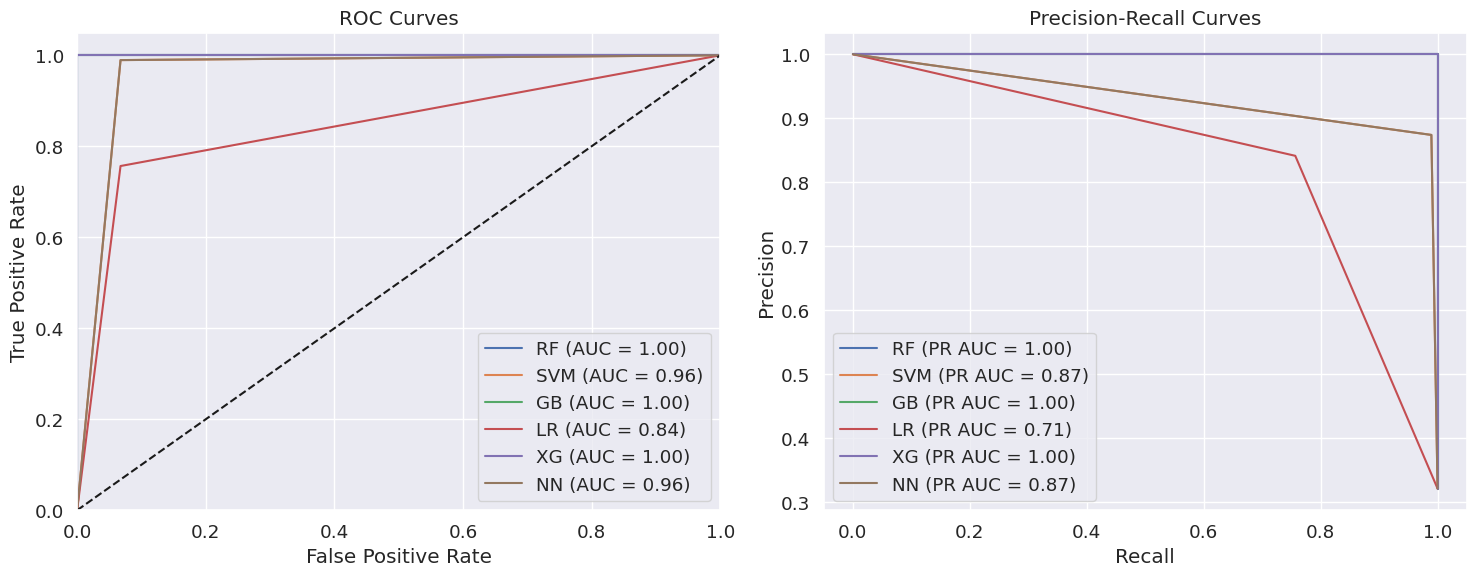

In [209]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def plot_roc_pr_curves(y_test, predictions_dict):
    plt.figure(figsize=(15, 6))

    # Plot ROC curves
    plt.subplot(1, 2, 1)
    for label, predictions in predictions_dict.items():
        fpr, tpr, _ = roc_curve(y_test, predictions)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')

    # Plot Precision-Recall curves
    plt.subplot(1, 2, 2)
    for label, predictions in predictions_dict.items():
        precision, recall, _ = precision_recall_curve(y_test, predictions)
        pr_auc = average_precision_score(y_test, predictions)
        plt.plot(recall, precision, label=f'{label} (PR AUC = {pr_auc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc='lower left')

    plt.tight_layout()
    output_path = '/kaggle/working/roc_pr_curves.png'
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()

# Example usage
predictions_dict = {
    'RF': rf_predictions,
    'SVM': svm_predictions,
    'GB': gb_predictions,
    'LR': lr_predictions,
    'XG': xgboost_predictions,
    'NN': nn_predictions
}

plot_roc_pr_curves(y_test, predictions_dict)


In [210]:
rf_confusion = confusion_matrix(y_test, rf_predictions)
svm_confusion = confusion_matrix(y_test, svm_predictions)
gb_confusion = confusion_matrix(y_test, gb_predictions)
lr_confusion = confusion_matrix(y_test, lr_predictions)
xgboost_confusion = confusion_matrix(y_test, xgboost_predictions)
nn_confusion = confusion_matrix(y_test, nn_predictions)

def print_confusion_matrices_values(conf_matrices):
   
        # Extract values from the confusion matrix
        true_negatives = conf_matrices[0, 0]
        false_positives = conf_matrices[0, 1]
        false_negatives = conf_matrices[1, 0]
        true_positives = conf_matrices[1, 1]

        # Calculate the total number of instances
        total_instances = true_negatives + false_positives + false_negatives + true_positives

        # Print the description of the confusion matrix values
        #print(f"\nConfusion Matrix for {label}:")
        print(f"True Negatives (TN): {true_negatives} (Instances correctly predicted as 'normal')")
        print(f"False Positives (FP): {false_positives} (Instances incorrectly predicted as 'malicious')")
        print(f"False Negatives (FN): {false_negatives} (Instances incorrectly predicted as 'normal')")
        print(f"True Positives (TP): {true_positives} (Instances correctly predicted as 'malicious')")
        print(f"Total Instances: {total_instances}")
# Print the metrics for each model  
print("Random Forest Metrics:")    
print_confusion_matrices_values(rf_confusion)
print("\nSVM Metrics:")
print_confusion_matrices_values(svm_confusion)
print("\nGradient Boosting Metrics:")
print_confusion_matrices_values(gb_confusion)
print("\nLogistic Regression Metrics:")
print_confusion_matrices_values(lr_confusion)
print("\nXGBoost Metrics:")
print_confusion_matrices_values(xgboost_confusion)
print("\nNeural Network Model Metrics:")
print_confusion_matrices_values(nn_confusion)

Random Forest Metrics:
True Negatives (TN): 400 (Instances correctly predicted as 'normal')
False Positives (FP): 0 (Instances incorrectly predicted as 'malicious')
False Negatives (FN): 0 (Instances incorrectly predicted as 'normal')
True Positives (TP): 189 (Instances correctly predicted as 'malicious')
Total Instances: 589

SVM Metrics:
True Negatives (TN): 373 (Instances correctly predicted as 'normal')
False Positives (FP): 27 (Instances incorrectly predicted as 'malicious')
False Negatives (FN): 2 (Instances incorrectly predicted as 'normal')
True Positives (TP): 187 (Instances correctly predicted as 'malicious')
Total Instances: 589

Gradient Boosting Metrics:
True Negatives (TN): 400 (Instances correctly predicted as 'normal')
False Positives (FP): 0 (Instances incorrectly predicted as 'malicious')
False Negatives (FN): 0 (Instances incorrectly predicted as 'normal')
True Positives (TP): 189 (Instances correctly predicted as 'malicious')
Total Instances: 589

Logistic Regressio

In [211]:
df = pd.read_csv("/kaggle/input/networkmodel12/network_testing.csv", encoding='ISO-8859-1')
df

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,Acknowledgment Number,Time to Live,Arrival Time,S7 Communication,Data length,Function,Length.1,Byte Address,Info,Label
0,129,2.036289,MS-NLB-PhysServer-27_1b:8e:33:00,LLDP_Multicast,LLDP,152,NaN,NaN,NaN,NaN,NaN,NaN,"Nov 14, 2023 11:18:04.172641000 China Standard...",NaN,NaN,NaN,NaN,NaN,LA/windows10 LA/port-001 20 SysN=WINDOWS10 Sys...,Anormal
1,142,2.263963,02:a9:fe:74:ca:01,LLDP_Multicast,LLDP,294,NaN,NaN,NaN,NaN,NaN,NaN,"Nov 14, 2023 11:18:04.400315000 China Standard...",NaN,NaN,NaN,NaN,NaN,LA/plcxb1.profinetxainterfacexb1036c LA/port-0...,Anormal
2,143,2.264054,02:a9:fe:74:ca:03,LLDP_Multicast,LLDP,294,NaN,NaN,NaN,NaN,NaN,NaN,"Nov 14, 2023 11:18:04.400406000 China Standard...",NaN,NaN,NaN,NaN,NaN,LA/plcxb1.profinetxainterfacexb2022c LA/port-0...,Anormal
3,441,7.323145,02:a9:fe:74:ca:01,LLDP_Multicast,LLDP,294,NaN,NaN,NaN,NaN,NaN,NaN,"Nov 14, 2023 11:18:09.459497000 China Standard...",NaN,NaN,NaN,NaN,NaN,LA/plcxb1.profinetxainterfacexb1036c LA/port-0...,Anormal
4,442,7.323195,02:a9:fe:74:ca:03,LLDP_Multicast,LLDP,294,NaN,NaN,NaN,NaN,NaN,NaN,"Nov 14, 2023 11:18:09.459547000 China Standard...",NaN,NaN,NaN,NaN,NaN,LA/plcxb1.profinetxainterfacexb2022c LA/port-0...,Anormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11267,565770,459.184218,192.168.0.13,192.168.0.1,S7COMM,85,0.001101,41736.0,102.0,24027.0,18154.0,64.0,"Jan 7, 2024 22:40:15.918524000 China Standard...",â\234\223,0.0,Read Var,NaN,378.0,ROSCTR:[Job ] Function:[Read Var],Anormal
11268,565834,459.232641,192.168.0.13,192.168.0.1,S7COMM,85,0.101092,44404.0,102.0,12150.0,8880.0,64.0,"Jan 7, 2024 22:40:15.966947000 China Standard...",â\234\223,0.0,Read Var,NaN,4.0,ROSCTR:[Job ] Function:[Read Var],Anormal
11269,567014,460.185767,192.168.0.13,192.168.0.1,S7COMM,85,0.958390,41736.0,102.0,24058.0,18180.0,64.0,"Jan 7, 2024 22:40:16.920073000 China Standard...",â\234\223,0.0,Read Var,NaN,378.0,ROSCTR:[Job ] Function:[Read Var],Anormal
11270,567017,460.186945,192.168.0.13,192.168.0.1,S7COMM,90,0.000613,41736.0,102.0,24089.0,18206.0,64.0,"Jan 7, 2024 22:40:16.921251000 China Standard...",â\234\223,5.0,Write Var,1.0,378.0,ROSCTR:[Job ] Function:[Write Var],Anormal


In [212]:
# Assuming you have a DataFrame called df
missing_values = df.isna()  # or df.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the count of missing values per column
print(missing_count)

No.                                                 0
Time                                                0
Source                                              0
Destination                                         0
Protocol                                            0
Length                                              0
Time since previous frame in this TCP stream      581
Source Port                                       581
Destination Port                                  581
Sequence Number                                   581
Acknowledgment Number                             581
Time to Live                                      265
Arrival Time                                        0
S7 Communication                                 4090
Data length                                      4090
Function                                         4090
Length.1                                         4761
Byte Address                                    10187
Info                        

In [213]:
# Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
numeric_columns = ['Source', 'Destination', 'Length','Protocol',
       'Source Port',
       'Destination Port', 
       'Time to Live', 'Byte Address']


def preprocessing(df,numeric_columns):
    #copy of dataframe
    data = df.copy()
    # Replace NaN values with 0
    data.fillna(0, inplace=True)
    '''
      # Replace 0 values in 'Function' column with 'Unknown'
    data['Function'] = data['Function'].replace(0, 'Unknown')

    # Label encoding for specific string columns
    label_encoder = LabelEncoder()

    # Only encode string values while keeping 0s intact
    mask = data['Function'].apply(lambda x: isinstance(x, str))
    data.loc[mask, 'Function'] = label_encoder.fit_transform(data.loc[mask, 'Function'])
    data['Function'] = data['Function'].astype(int)
     '''
    # Convert labels to numeric form using label encoding
    label_encoder = LabelEncoder()
    
    data['Source'] = data['Source'].apply(lambda x: 0 if x in ['192.168.0.1', '192.168.0.2'] else 1)
    data['Destination'] = data['Destination'].apply(lambda x: 0 if x in ['192.168.0.1', '192.168.0.2'] else 1)
    
    data['Byte Address'] = data['Byte Address'].apply(lambda x: 0 if x in [int('0')] else 1)
   
    # Assuming 'data' is your DataFrame and 'Protocol' column needs encoding
    data['Protocol'] = data['Protocol'].fillna('Unknown')  # Fill NaN values with 'Unknown'

    known_protocols = ['ARP', 'BROWSER', 'COTP', 'ICMPv6', 'IGMPv3', 'IPv4', 'LLDP', 'LLMNR',
                       'MDNS', 'NBNS', 'NTP', 'OpcUa', 'S7COMM', 'SSDP', 'TCP','TPKT','ICMP']

    # Create a label encoder
    label_encoder = LabelEncoder()

    # Fit and transform the 'Protocol' column
    data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

    # Handling unknown protocols
    if 'Unknown' not in label_encoder.classes_:
        # Assign a unique value for 'Unknown' protocol
        unknown_label = max(data['Protocol']) + 1
        print(f"Assigning 'Unknown' protocol label as: {unknown_label}")
        data.loc[data['Protocol'] == 'Unknown', 'Protocol'] = unknown_label

    # Define a function to encode protocols or assign a default value for unknown ones
    def encode_protocol(protocol):
        if protocol in known_protocols:
            return label_encoder.transform([protocol])[0]
        else:
            return unknown_label  # Assign the value you previously determined for unknown protocols

    # Apply the encode_protocol function to the 'Protocol' column
    data['Protocol'] = data['Protocol'].apply(encode_protocol)

    
    # Fit and transform the 'Label' column
    #data['Label'] = label_encoder.fit_transform(data['Label'])

    # Invert the labels
    #data['Label'] = 1 - data['Label']
    #y = data['Label']
    # Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
    data= data[numeric_columns]
    dataframe = data.copy()
    # Convert the list to a NumPy array
    #labels = np.array(y)
    #get values from dataset
    raw_data = data.values
    # Get values not last column which is target column
    data = raw_data[:, 0:-1]
    #normalization of data
    data = ((data - data.min()) / (data.max() - data.min()))*2
    return dataframe,data

In [214]:
dataframe,data = preprocessing(df,numeric_columns)

Assigning 'Unknown' protocol label as: 13


In [215]:
# Load your models
rf_model = load('/kaggle/working/random_forest_model.joblib')
svm_model = load('/kaggle/working/svm_model.joblib')
gb_model = load('/kaggle/working/gradient_boosting_model.joblib')
lr_model = load('/kaggle/working/logistic_regression_model.joblib')
xgboost_model = load('/kaggle/working/xgboost_model.joblib')

In [216]:
#datashape
data.shape

(11272, 7)

In [217]:
#new data 
X_new = data

In [218]:
#testing new data
# Assuming X_new is your new dataset
rf_predictions = rf_model.predict(X_new)
svm_predictions = svm_model.predict(X_new)
gb_predictions = gb_model.predict(X_new)
lr_predictions = lr_model.predict(X_new)
xgboost_predictions = xgboost_model.predict(X_new)

In [219]:
# Load your Keras model
nn_model = tf.keras.models.load_model('/kaggle/working/neural_network_model.h5')
# Assuming X_new is your new dataset
nn_predictions = nn_model.predict(X_new)

353/353 [==============================] - 1s 1ms/step


In [220]:
# Create a DataFrame for predictions

predictions_df = pd.DataFrame({
    'RF_Predictions': rf_predictions,
    'SVM_Predictions': svm_predictions,
    'GB_Predictions': gb_predictions,
    'LR_Predictions': lr_predictions,
    'XGboost_Predictions': xgboost_predictions,
})

# Concatenate the predictions DataFrame with your new dataset
result_df = pd.concat([df, predictions_df], axis=1)
result_df

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,...,Function,Length.1,Byte Address,Info,Label,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions
0,129,2.036289,MS-NLB-PhysServer-27_1b:8e:33:00,LLDP_Multicast,LLDP,152,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA/windows10 LA/port-001 20 SysN=WINDOWS10 Sys...,Anormal,1,1,1,1,0
1,142,2.263963,02:a9:fe:74:ca:01,LLDP_Multicast,LLDP,294,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA/plcxb1.profinetxainterfacexb1036c LA/port-0...,Anormal,1,1,1,1,0
2,143,2.264054,02:a9:fe:74:ca:03,LLDP_Multicast,LLDP,294,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA/plcxb1.profinetxainterfacexb2022c LA/port-0...,Anormal,1,1,1,1,0
3,441,7.323145,02:a9:fe:74:ca:01,LLDP_Multicast,LLDP,294,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA/plcxb1.profinetxainterfacexb1036c LA/port-0...,Anormal,1,1,1,1,0
4,442,7.323195,02:a9:fe:74:ca:03,LLDP_Multicast,LLDP,294,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,LA/plcxb1.profinetxainterfacexb2022c LA/port-0...,Anormal,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11267,565770,459.184218,192.168.0.13,192.168.0.1,S7COMM,85,0.001101,41736.0,102.0,24027.0,...,Read Var,NaN,378.0,ROSCTR:[Job ] Function:[Read Var],Anormal,1,1,1,0,0
11268,565834,459.232641,192.168.0.13,192.168.0.1,S7COMM,85,0.101092,44404.0,102.0,12150.0,...,Read Var,NaN,4.0,ROSCTR:[Job ] Function:[Read Var],Anormal,1,1,1,0,0
11269,567014,460.185767,192.168.0.13,192.168.0.1,S7COMM,85,0.958390,41736.0,102.0,24058.0,...,Read Var,NaN,378.0,ROSCTR:[Job ] Function:[Read Var],Anormal,1,1,1,0,0
11270,567017,460.186945,192.168.0.13,192.168.0.1,S7COMM,90,0.000613,41736.0,102.0,24089.0,...,Write Var,1.0,378.0,ROSCTR:[Job ] Function:[Write Var],Anormal,1,1,1,0,0


In [221]:
# Assuming nn_predictions contains the continuous probabilities from your neural network model
threshold = 0.5
binary_predictions = (nn_predictions > threshold).astype(int)

# Convert predictions to DataFrame
nn_binary_predictions_df = pd.DataFrame(binary_predictions, columns=['NN_Binary_Predictions'])
# Concatenate the binary predictions DataFrame with your new dataset
result_df = pd.concat([result_df, nn_binary_predictions_df], axis=1)
result_df.head()

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,...,Length.1,Byte Address,Info,Label,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,129,2.036289,MS-NLB-PhysServer-27_1b:8e:33:00,LLDP_Multicast,LLDP,152,NaN,NaN,NaN,NaN,...,NaN,NaN,LA/windows10 LA/port-001 20 SysN=WINDOWS10 Sys...,Anormal,1,1,1,1,0,1
1,142,2.263963,02:a9:fe:74:ca:01,LLDP_Multicast,LLDP,294,NaN,NaN,NaN,NaN,...,NaN,NaN,LA/plcxb1.profinetxainterfacexb1036c LA/port-0...,Anormal,1,1,1,1,0,1
2,143,2.264054,02:a9:fe:74:ca:03,LLDP_Multicast,LLDP,294,NaN,NaN,NaN,NaN,...,NaN,NaN,LA/plcxb1.profinetxainterfacexb2022c LA/port-0...,Anormal,1,1,1,1,0,1
3,441,7.323145,02:a9:fe:74:ca:01,LLDP_Multicast,LLDP,294,NaN,NaN,NaN,NaN,...,NaN,NaN,LA/plcxb1.profinetxainterfacexb1036c LA/port-0...,Anormal,1,1,1,1,0,1
4,442,7.323195,02:a9:fe:74:ca:03,LLDP_Multicast,LLDP,294,NaN,NaN,NaN,NaN,...,NaN,NaN,LA/plcxb1.profinetxainterfacexb2022c LA/port-0...,Anormal,1,1,1,1,0,1


In [222]:
output_df = result_df

In [223]:
network_output_df = result_df

In [224]:
network_output_df.to_csv('network_output_model7.csv', index=False)  # Save to a CSV file without including the index

In [225]:
# Assuming you have a DataFrame named 'output_df' containing the predictions
# Columns: 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'NN_Binary_Predictions'

# Count occurrences of 1 and 0 in each model's predictions
rf_counts = output_df['RF_Predictions'].value_counts()
svm_counts = output_df['SVM_Predictions'].value_counts()
gb_counts = output_df['GB_Predictions'].value_counts()
lr_counts = output_df['LR_Predictions'].value_counts()
XGboost_counts = output_df['XGboost_Predictions'].value_counts()
nn_counts = output_df['NN_Binary_Predictions'].value_counts()

# Print the counts
print("Random Forest Predictions:")
print(rf_counts)

print("\nSVM Predictions:")
print(svm_counts)

print("\nGradient Boosting Predictions:")
print(gb_counts)

print("\nLogistic Regression Predictions:")
print(lr_counts)

print("\nXGboost Predictions:")
print(XGboost_counts)

print("\nNeural Network Binary Predictions:")
print(nn_counts)


Random Forest Predictions:
RF_Predictions
0    8816
1    2456
Name: count, dtype: int64

SVM Predictions:
SVM_Predictions
0    8730
1    2542
Name: count, dtype: int64

Gradient Boosting Predictions:
GB_Predictions
0    9078
1    2194
Name: count, dtype: int64

Logistic Regression Predictions:
LR_Predictions
1    6143
0    5129
Name: count, dtype: int64

XGboost Predictions:
XGboost_Predictions
0    11272
Name: count, dtype: int64

Neural Network Binary Predictions:
NN_Binary_Predictions
1    7296
0    3976
Name: count, dtype: int64


In [226]:
import pandas as pd

# Assuming 'df' is your DataFrame
output_df.rename(columns={'Label': 'label'}, inplace=True)


In [227]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming you have a DataFrame named 'output_df' with columns:
# 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions', 'Actual_Labels'

# Define a list of model names
model_names = ['RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions']

# Loop through each model
for i, model_name in enumerate(model_names):
    # Get the predictions and actual labels for the current model
    predictions_col = f'{model_name}'
    actual_labels = output_df['label']
    predictions = output_df[predictions_col]

    # Convert predicted labels to strings
    predictions = predictions.map({0: 'Normal', 1: 'Anormal'})

    # Create a confusion matrix
    confusion_mat = confusion_matrix(actual_labels, predictions)

    # Print confusion matrix
    print(f"\nConfusion Matrix for {model_name}:")
    print(pd.DataFrame(confusion_mat, index=['Actual Normal', 'Actual Abnormal'], columns=['Predicted Normal', 'Predicted Abnormal']))

    # Generate and print classification report
    classification_rep = classification_report(actual_labels, predictions)
    print(f"\nClassification Report for {model_name}:")
    print(classification_rep)



Confusion Matrix for RF_Predictions:
                 Predicted Normal  Predicted Abnormal
Actual Normal                2446                  74
Actual Abnormal                10                8742

Classification Report for RF_Predictions:
              precision    recall  f1-score   support

     Anormal       1.00      0.97      0.98      2520
      Normal       0.99      1.00      1.00      8752

    accuracy                           0.99     11272
   macro avg       0.99      0.98      0.99     11272
weighted avg       0.99      0.99      0.99     11272


Confusion Matrix for SVM_Predictions:
                 Predicted Normal  Predicted Abnormal
Actual Normal                2511                   9
Actual Abnormal                31                8721

Classification Report for SVM_Predictions:
              precision    recall  f1-score   support

     Anormal       0.99      1.00      0.99      2520
      Normal       1.00      1.00      1.00      8752

    accuracy         

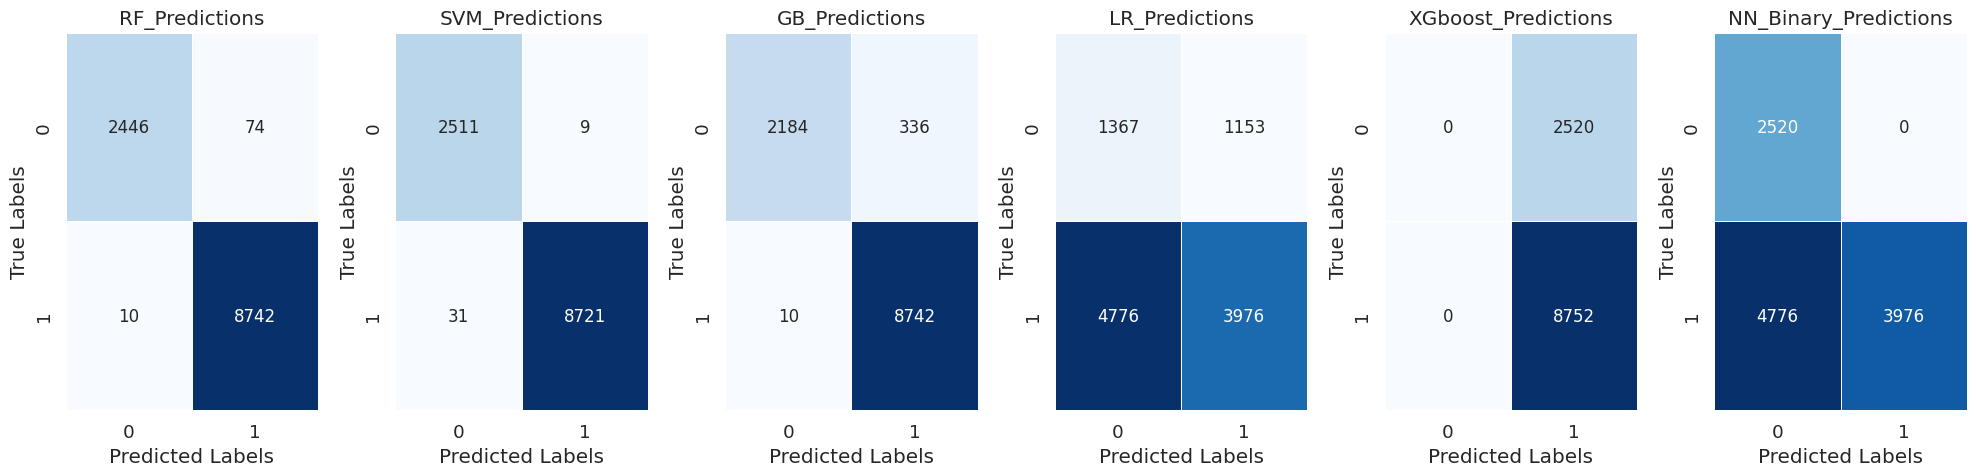

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming you have a DataFrame named 'output_df' with columns:
# 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions', 'Actual_Labels'

# Define a list of model names
model_names = ['RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(model_names), figsize=(20, 5))

# Loop through each model
for i, model_name in enumerate(model_names):
    # Get the predictions and actual labels for the current model
    predictions_col = f'{model_name}'
    actual_labels = output_df['label']
    predictions = output_df[predictions_col]

    # Convert predicted labels to strings
    predictions = predictions.map({0: 'Normal', 1: 'Anormal'})

    # Create a confusion matrix
    confusion_mat = confusion_matrix(actual_labels, predictions)

    # Plot confusion matrix using seaborn
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axes[i])
    axes[i].set_title(f'{model_name}')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

# Adjust layout
plt.tight_layout()
# Save the plot
output_path = '/kaggle/working/model_performance_metrics3.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()


In [229]:
df = pd.read_csv("/kaggle/input/networkmodel12/networktest3.csv", encoding='ISO-8859-1')
df.head()

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,Acknowledgment Number,Time to Live,Arrival Time,S7 Communication,Data length,Function,Length.1,Byte Address,Info,label
0,1,0.000000,192.168.0.2,192.168.0.1,COTP,61,0.000000,50339.0,102.0,1.0,1.0,128.0,"Jan 24, 2024 15:28:40.659549000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
1,2,0.012314,192.168.0.2,192.168.0.1,COTP,145,0.000000,50340.0,102.0,1.0,1.0,128.0,"Jan 24, 2024 15:28:40.671863000 China Standard...",NaN,NaN,NaN,NaN,NaN,DT TPDU (0) EOT,Normal
2,3,0.012802,192.168.0.2,192.168.0.1,COTP,61,0.000488,50340.0,102.0,92.0,55.0,128.0,"Jan 24, 2024 15:28:40.672351000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
3,4,0.013044,192.168.0.2,192.168.0.1,COTP,61,0.000242,50340.0,102.0,99.0,317.0,128.0,"Jan 24, 2024 15:28:40.672593000 China Standard...",NaN,NaN,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal
4,5,0.326079,192.168.0.2,192.168.0.1,COTP,145,0.313035,50340.0,102.0,106.0,317.0,128.0,"Jan 24, 2024 15:28:40.985628000 China Standard...",NaN,NaN,NaN,NaN,NaN,DT TPDU (0) EOT,Normal


In [230]:
# Assuming you have a DataFrame called df
missing_values = df.isna()  # or df.isnull()

# Count the number of missing values in each column
missing_count = missing_values.sum()

# Display the count of missing values per column
print(missing_count)

No.                                                 0
Time                                                0
Source                                              0
Destination                                         0
Protocol                                            0
Length                                              0
Time since previous frame in this TCP stream     5335
Source Port                                      5335
Destination Port                                 5335
Sequence Number                                  5335
Acknowledgment Number                            5335
Time to Live                                     1583
Arrival Time                                        0
S7 Communication                                13227
Data length                                     13227
Function                                        13227
Length.1                                        14200
Byte Address                                    13238
Info                        

In [231]:
# Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
numeric_columns = ['Source', 'Destination', 'Protocol', 'Length',
       'Source Port',
       'Destination Port', 
       'Time to Live', 'Byte Address']


def preprocessing(df,numeric_columns):
    #copy of dataframe
    data = df.copy()
    # Replace NaN values with 0
    data.fillna(0, inplace=True)
    '''
      # Replace 0 values in 'Function' column with 'Unknown'
    data['Function'] = data['Function'].replace(0, 'Unknown')

    # Label encoding for specific string columns
    label_encoder = LabelEncoder()

    # Only encode string values while keeping 0s intact
    mask = data['Function'].apply(lambda x: isinstance(x, str))
    data.loc[mask, 'Function'] = label_encoder.fit_transform(data.loc[mask, 'Function'])
    data['Function'] = data['Function'].astype(int)
     '''
    # Convert labels to numeric form using label encoding
    label_encoder = LabelEncoder()
    
    data['Source'] = data['Source'].apply(lambda x: 0 if x in ['192.168.0.1', '192.168.0.2'] else 1)
    data['Destination'] = data['Destination'].apply(lambda x: 0 if x in ['192.168.0.1', '192.168.0.2'] else 1)
    
    data['Byte Address'] = data['Byte Address'].apply(lambda x: 0 if x in [int('0')] else 1)
   
    # Assuming 'data' is your DataFrame and 'Protocol' column needs encoding
    data['Protocol'] = data['Protocol'].fillna('Unknown')  # Fill NaN values with 'Unknown'

    known_protocols = ['ARP', 'BROWSER', 'COTP', 'ICMPv6', 'IGMPv3', 'IPv4', 'LLDP', 'LLMNR',
                       'MDNS', 'NBNS', 'NTP', 'OpcUa', 'S7COMM', 'SSDP', 'TCP','TPKT','ICMP']

    # Create a label encoder
    label_encoder = LabelEncoder()

    # Fit and transform the 'Protocol' column
    data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

    # Handling unknown protocols
    if 'Unknown' not in label_encoder.classes_:
        # Assign a unique value for 'Unknown' protocol
        unknown_label = max(data['Protocol']) + 1
        print(f"Assigning 'Unknown' protocol label as: {unknown_label}")
        data.loc[data['Protocol'] == 'Unknown', 'Protocol'] = unknown_label

    # Define a function to encode protocols or assign a default value for unknown ones
    def encode_protocol(protocol):
        if protocol in known_protocols:
            return label_encoder.transform([protocol])[0]
        else:
            return unknown_label  # Assign the value you previously determined for unknown protocols

    # Apply the encode_protocol function to the 'Protocol' column
    data['Protocol'] = data['Protocol'].apply(encode_protocol)

    
    # Fit and transform the 'Label' column
    #data['Label'] = label_encoder.fit_transform(data['Label'])

    # Invert the labels
    #data['Label'] = 1 - data['Label']
    #y = data['Label']
    # Drop non-numeric columns and convert IP columns to numerical form (using dummy variables)
    data= data[numeric_columns]
    dataframe = data.copy()
    # Convert the list to a NumPy array
    #labels = np.array(y)
    #get values from dataset
    raw_data = data.values
    # Get values not last column which is target column
    data = raw_data[:, 0:-1]
    #normalization of data
    data = ((data - data.min()) / (data.max() - data.min()))*2
    return dataframe,data

In [232]:
dataframe,data = preprocessing(df,numeric_columns)

Assigning 'Unknown' protocol label as: 16


In [233]:
# Load your models
rf_model = load('/kaggle/working/random_forest_model.joblib')
svm_model = load('/kaggle/working/svm_model.joblib')
gb_model = load('/kaggle/working/gradient_boosting_model.joblib')
lr_model = load('/kaggle/working/logistic_regression_model.joblib')
xgboost_model = load('/kaggle/working/xgboost_model.joblib')

In [234]:
#datashape
data.shape

(14946, 7)

In [235]:
#new data 
X_new = data

In [236]:
#testing new data
# Assuming X_new is your new dataset
rf_predictions = rf_model.predict(X_new)
svm_predictions = svm_model.predict(X_new)
gb_predictions = gb_model.predict(X_new)
lr_predictions = lr_model.predict(X_new)
xgboost_predictions = xgboost_model.predict(X_new)

In [237]:
# Load your Keras model
nn_model = tf.keras.models.load_model('/kaggle/working/neural_network_model.h5')
# Assuming X_new is your new dataset
nn_predictions = nn_model.predict(X_new)

468/468 [==============================] - 1s 1ms/step


In [238]:
# Create a DataFrame for predictions

predictions_df = pd.DataFrame({
    'RF_Predictions': rf_predictions,
    'SVM_Predictions': svm_predictions,
    'GB_Predictions': gb_predictions,
    'LR_Predictions': lr_predictions,
    'XGboost_Predictions': xgboost_predictions,
})

# Concatenate the predictions DataFrame with your new dataset
result_df = pd.concat([df, predictions_df], axis=1)
result_df

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,...,Function,Length.1,Byte Address,Info,label,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions
0,1,0.000000,192.168.0.2,192.168.0.1,COTP,61,0.000000,50339.0,102.0,1.0,...,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0
1,2,0.012314,192.168.0.2,192.168.0.1,COTP,145,0.000000,50340.0,102.0,1.0,...,NaN,NaN,NaN,DT TPDU (0) EOT,Normal,0,0,0,0,0
2,3,0.012802,192.168.0.2,192.168.0.1,COTP,61,0.000488,50340.0,102.0,92.0,...,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0
3,4,0.013044,192.168.0.2,192.168.0.1,COTP,61,0.000242,50340.0,102.0,99.0,...,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0
4,5,0.326079,192.168.0.2,192.168.0.1,COTP,145,0.313035,50340.0,102.0,106.0,...,NaN,NaN,NaN,DT TPDU (0) EOT,Normal,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14941,14942,266.977050,192.168.0.2,224.0.0.252,LLMNR,64,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Standard query 0x8a68 A wpad,Normal,0,1,0,1,0
14942,14943,267.058935,192.168.0.2,192.168.0.1,COTP,145,0.310741,50340.0,102.0,88047.0,...,NaN,NaN,NaN,DT TPDU (0) EOT,Normal,0,0,0,0,0
14943,14944,267.059446,192.168.0.2,192.168.0.1,COTP,61,0.000511,50340.0,102.0,88138.0,...,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0
14944,14945,267.059632,192.168.0.2,192.168.0.1,COTP,61,0.000186,50340.0,102.0,88145.0,...,NaN,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0


In [239]:
# Assuming nn_predictions contains the continuous probabilities from your neural network model
threshold = 0.5
binary_predictions = (nn_predictions > threshold).astype(int)

# Convert predictions to DataFrame
nn_binary_predictions_df = pd.DataFrame(binary_predictions, columns=['NN_Binary_Predictions'])
# Concatenate the binary predictions DataFrame with your new dataset
result_df = pd.concat([result_df, nn_binary_predictions_df], axis=1)
result_df.head()

,No.,Time,Source,Destination,Protocol,Length,Time since previous frame in this TCP stream,Source Port,Destination Port,Sequence Number,...,Length.1,Byte Address,Info,label,RF_Predictions,SVM_Predictions,GB_Predictions,LR_Predictions,XGboost_Predictions,NN_Binary_Predictions
0,1,0.000000,192.168.0.2,192.168.0.1,COTP,61,0.000000,50339.0,102.0,1.0,...,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
1,2,0.012314,192.168.0.2,192.168.0.1,COTP,145,0.000000,50340.0,102.0,1.0,...,NaN,NaN,DT TPDU (0) EOT,Normal,0,0,0,0,0,0
2,3,0.012802,192.168.0.2,192.168.0.1,COTP,61,0.000488,50340.0,102.0,92.0,...,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
3,4,0.013044,192.168.0.2,192.168.0.1,COTP,61,0.000242,50340.0,102.0,99.0,...,NaN,NaN,"DT TPDU (0) [COTP fragment, 0 bytes]",Normal,0,0,0,0,0,0
4,5,0.326079,192.168.0.2,192.168.0.1,COTP,145,0.313035,50340.0,102.0,106.0,...,NaN,NaN,DT TPDU (0) EOT,Normal,0,0,0,0,0,0


In [240]:
output_df = result_df

In [241]:
network_output_df = result_df

In [242]:
network_output_df.to_csv('network_output_model7.csv', index=False)  # Save to a CSV file without including the index

In [243]:
# Assuming you have a DataFrame named 'output_df' containing the predictions
# Columns: 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'NN_Binary_Predictions'

# Count occurrences of 1 and 0 in each model's predictions
rf_counts = output_df['RF_Predictions'].value_counts()
svm_counts = output_df['SVM_Predictions'].value_counts()
gb_counts = output_df['GB_Predictions'].value_counts()
lr_counts = output_df['LR_Predictions'].value_counts()
XGboost_counts = output_df['XGboost_Predictions'].value_counts()
nn_counts = output_df['NN_Binary_Predictions'].value_counts()

# Print the counts
print("Random Forest Predictions:")
print(rf_counts)

print("\nSVM Predictions:")
print(svm_counts)

print("\nGradient Boosting Predictions:")
print(gb_counts)

print("\nLogistic Regression Predictions:")
print(lr_counts)

print("\nXGboost Predictions:")
print(XGboost_counts)

print("\nNeural Network Binary Predictions:")
print(nn_counts)


Random Forest Predictions:
RF_Predictions
1    10867
0     4079
Name: count, dtype: int64

SVM Predictions:
SVM_Predictions
1    9460
0    5486
Name: count, dtype: int64

Gradient Boosting Predictions:
GB_Predictions
1    10867
0     4079
Name: count, dtype: int64

Logistic Regression Predictions:
LR_Predictions
1    8311
0    6635
Name: count, dtype: int64

XGboost Predictions:
XGboost_Predictions
1    10867
0     4079
Name: count, dtype: int64

Neural Network Binary Predictions:
NN_Binary_Predictions
1    9448
0    5498
Name: count, dtype: int64


In [244]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming you have a DataFrame named 'output_df' with columns:
# 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions', 'Actual_Labels'

# Define a list of model names
model_names = ['RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions']

# Loop through each model
for i, model_name in enumerate(model_names):
    # Get the predictions and actual labels for the current model
    predictions_col = f'{model_name}'
    actual_labels = output_df['label']
    predictions = output_df[predictions_col]

    # Convert predicted labels to strings
    predictions = predictions.map({0: 'Normal', 1: 'Abnormal'})

    # Create a confusion matrix
    confusion_mat = confusion_matrix(actual_labels, predictions)

    # Print confusion matrix
    print(f"\nConfusion Matrix for {model_name}:")
    print(pd.DataFrame(confusion_mat, index=['Actual Normal', 'Actual Abnormal'], columns=['Predicted Normal', 'Predicted Abnormal']))

    # Generate and print classification report
    classification_rep = classification_report(actual_labels, predictions)
    print(f"\nClassification Report for {model_name}:")
    print(classification_rep)



Confusion Matrix for RF_Predictions:
                 Predicted Normal  Predicted Abnormal
Actual Normal               10867                   0
Actual Abnormal                 0                4079

Classification Report for RF_Predictions:
              precision    recall  f1-score   support

    Abnormal       1.00      1.00      1.00     10867
      Normal       1.00      1.00      1.00      4079

    accuracy                           1.00     14946
   macro avg       1.00      1.00      1.00     14946
weighted avg       1.00      1.00      1.00     14946


Confusion Matrix for SVM_Predictions:
                 Predicted Normal  Predicted Abnormal
Actual Normal                8683                2184
Actual Abnormal               777                3302

Classification Report for SVM_Predictions:
              precision    recall  f1-score   support

    Abnormal       0.92      0.80      0.85     10867
      Normal       0.60      0.81      0.69      4079

    accuracy         

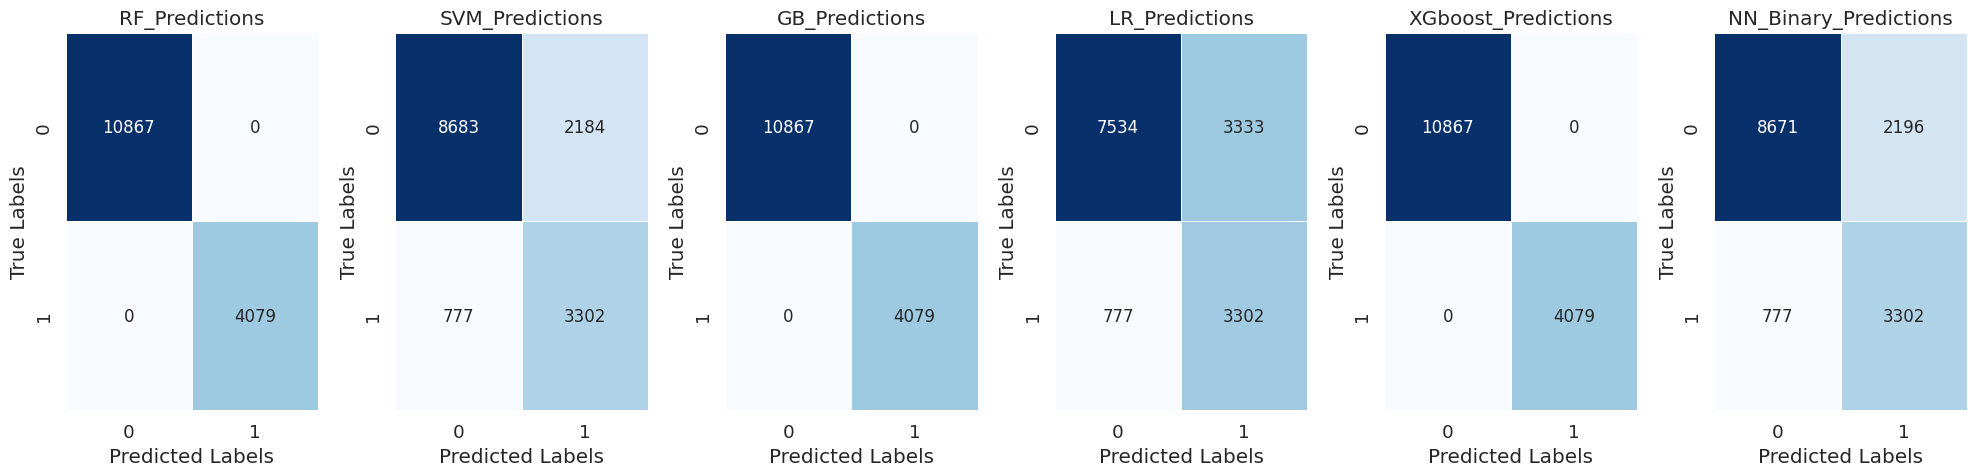

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming you have a DataFrame named 'output_df' with columns:
# 'RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions', 'Actual_Labels'

# Define a list of model names
model_names = ['RF_Predictions', 'SVM_Predictions', 'GB_Predictions', 'LR_Predictions', 'XGboost_Predictions', 'NN_Binary_Predictions']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(model_names), figsize=(20, 5))

# Loop through each model
for i, model_name in enumerate(model_names):
    # Get the predictions and actual labels for the current model
    predictions_col = f'{model_name}'
    actual_labels = output_df['label']
    predictions = output_df[predictions_col]

    # Convert predicted labels to strings
    predictions = predictions.map({0: 'Normal', 1: 'Abnormal'})

    # Create a confusion matrix
    confusion_mat = confusion_matrix(actual_labels, predictions)

    # Plot confusion matrix using seaborn
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12}, linewidths=0.5, ax=axes[i])
    axes[i].set_title(f'{model_name}')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

# Adjust layout
plt.tight_layout()

# Save the plot
output_path = '/kaggle/working/model_performance_metrics3_dataset2.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()
